<a href="https://colab.research.google.com/github/YifanSong348/STATS302/blob/main/Week%205/Oja's_Rule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#STATS302 HW 5 - Yifan Song
###Problem 2. Programming (Oja’s rule)

In [ ]:
import pandas as pd
import numpy as np

import random
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [ ]:
def rand_points(n, r):
    """returns n random points on a line crossing the origin 
    (1-dimensional subspace) with slope = a"""
    random.seed(r)
    a = random.uniform(0, 1000)
    b = random.uniform(0, 1000)
    # c = random.uniform(0, 1000)
    points = []
    print("a = ", a, "\nb = ", b)
    for i in range(n):
        x = random.uniform(0, 1000)
        y = random.uniform(0, 1000)
        points.append((x, a*x, b*x))
    return points

points = rand_points(20, 0)
print("random generated data points x_tilde:\n", points)

a =  844.4218515250482 
b =  757.9544029403024
random generated data points x_tilde:
 [(420.571580830845, 355139.8329839986, 318774.08144230227), (511.27472136860854, 431731.54685603356, 387522.9261734132), (783.7985890347726, 661856.655775463, 594083.5915773025), (476.5969541523558, 402448.88245653076, 361238.7598277155), (908.1128851953351, 766830.3639103984, 688308.1597006257), (281.83784439970384, 237990.03439782636, 213620.23507795937), (618.3689966753316, 522164.29309826985, 468695.5036718448), (909.7462559682401, 768209.6178826818, 689546.180269583), (810.2172359965896, 684165.1385577471, 614107.7213617371), (310.1475693193326, 261895.38473062406, 235077.7157268208), (898.8382879679934, 758998.6913475374, 681278.4378966641), (472.14271545271333, 398687.62596664415, 357862.6499935744), (434.1718354537837, 366624.18517391256, 329082.45431486785), (913.0110532378982, 770966.4840379803, 692020.7477348278), (477.009776552717, 402797.47871219483, 361551.66038370173), (260.492310391959

In [ ]:
mean = [0, 0, 0]
cov = 0.1*np.identity(3)
random.seed(0)
z = np.random.multivariate_normal(mean, cov, size=20)
print("Noisy data z:\n", z)

Noisy data z:
 [[-0.36480219 -0.14493056  0.03127059]
 [ 0.41352168  0.28105705 -0.97449004]
 [ 0.31455782  0.87226949 -0.15455802]
 [-0.17268724  0.19768104 -0.07416581]
 [ 0.75740136  0.34193824 -0.39103788]
 [-0.37422215  0.07991536  0.4766331 ]
 [ 0.13872286  0.18916893 -0.23051075]
 [ 0.03820363  0.2681112   0.30325952]
 [-0.01749041 -0.37320384  0.37972409]
 [ 0.10942243  0.36475862  0.42984748]
 [ 0.5613788   0.44633878  0.50482637]
 [-0.52286375  0.31307076  0.11349937]
 [-0.09457379 -0.04780505  0.03501215]
 [ 0.06552059  0.18664475 -0.31399649]
 [ 0.07572722 -0.10214042  0.26515253]
 [ 0.1862254  -0.33201809 -0.36098635]
 [-0.23632018 -0.25432691 -0.08208497]
 [ 0.01563026  0.30035655 -0.2371045 ]
 [-0.34958948  0.49745722 -0.25327774]
 [-0.0630311   0.085012   -0.43641851]]


In [ ]:
# x = [i[0] for i in points]
# y = [i[1] for i in points]
# z = [i[2] for i in points]

In [ ]:
x_tilde = np.array(points)
# x = x_tilde[:,0] - z
x = x_tilde - z
print("x:\n", x)

x:
 [[4.20936383e+02 3.55139978e+05 3.18774050e+05]
 [5.10861200e+02 4.31731266e+05 3.87523901e+05]
 [7.83484031e+02 6.61855784e+05 5.94083746e+05]
 [4.76769641e+02 4.02448685e+05 3.61238834e+05]
 [9.07355484e+02 7.66830022e+05 6.88308551e+05]
 [2.82212067e+02 2.37989954e+05 2.13619758e+05]
 [6.18230274e+02 5.22164104e+05 4.68695734e+05]
 [9.09708052e+02 7.68209350e+05 6.89545877e+05]
 [8.10234726e+02 6.84165512e+05 6.14107342e+05]
 [3.10038147e+02 2.61895020e+05 2.35077286e+05]
 [8.98276909e+02 7.58998245e+05 6.81277933e+05]
 [4.72665579e+02 3.98687313e+05 3.57862536e+05]
 [4.34266409e+02 3.66624233e+05 3.29082419e+05]
 [9.12945533e+02 7.70966297e+05 6.92021062e+05]
 [4.76934049e+02 4.02797581e+05 3.61551395e+05]
 [2.60306085e+02 2.19965731e+05 1.97441655e+05]
 [5.48935624e+02 4.63333936e+05 4.15889135e+05]
 [7.19689056e+02 6.07734063e+05 5.45503573e+05]
 [8.25194567e+02 6.96516625e+05 6.25195135e+05]
 [1.20585041e+00 9.64936589e+02 8.66641350e+02]]


# a. Plot x1, · · · , xN in a 3D graph.

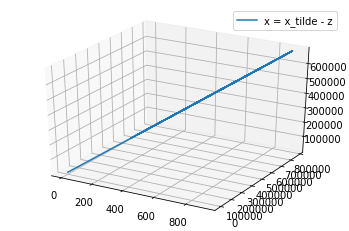

In [ ]:
fig = plt.figure()
# ax = fig.gca(projection='3d')
ax = plt.axes(projection='3d')

ax.plot(x.T[0], x.T[1], x.T[2], label='x = x_tilde - z')
ax.legend()
plt.show()

# b. Compute the empirical covariance matrix

In [ ]:
x_meaned = x - np.mean(x, axis = 0)
print("Centered data:\n", x_meaned)

Centered data:
 [[-1.58076100e+02 -1.33810954e+05 -1.20109278e+05]
 [-6.81512837e+01 -5.72196660e+04 -5.13594276e+04]
 [ 2.04471548e+02  1.72904852e+05  1.55200418e+05]
 [-1.02242842e+02 -8.65022470e+04 -7.76444942e+04]
 [ 3.28343000e+02  2.77879090e+05  2.49425223e+05]
 [-2.96800417e+02 -2.50960977e+05 -2.25263570e+05]
 [ 3.92177905e+01  3.32131721e+04  2.98124060e+04]
 [ 3.30695569e+02  2.79258418e+05  2.50662549e+05]
 [ 2.31222243e+02  1.95214580e+05  1.75224013e+05]
 [-2.68974336e+02 -2.27055912e+05 -2.03806042e+05]
 [ 3.19264426e+02  2.70047313e+05  2.42394605e+05]
 [-1.06346904e+02 -9.02636189e+04 -8.10207917e+04]
 [-1.44746074e+02 -1.22326699e+05 -1.09800909e+05]
 [ 3.33933049e+02  2.82015366e+05  2.53137734e+05]
 [-1.02078434e+02 -8.61533509e+04 -7.73319330e+04]
 [-3.18706398e+02 -2.68985201e+05 -2.41441674e+05]
 [-3.00768593e+01 -2.56169954e+04 -2.29941929e+04]
 [ 1.40676573e+02  1.18783132e+05  1.06620245e+05]
 [ 2.46182083e+02  2.07565694e+05  1.86311807e+05]
 [-5.77806633e+

In [ ]:
cov_mat = np.cov(x_meaned, rowvar = False)
print("Covariance matrix:\n", cov_mat)

Covariance matrix:
 [[6.77557658e+04 5.72419200e+07 5.13804601e+07]
 [5.72419200e+07 4.83595998e+10 4.34076720e+10]
 [5.13804601e+07 4.34076720e+10 3.89628119e+10]]


# c. Find the principal 1D subspace for the data (represented as a unit vector). Is it close to your line chosen for generating x˜n?

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
pca = PCA(n_components=3)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca_components = pca.transform(X_scaled)
print(pca_components.shape)
df_pca = pd.DataFrame(pca_components,columns = ['PC_1','PC_2','PC_3'])
df_pca.head()

(20, 3)


,PC_1,PC_2,PC_3
0,1.080597,-0.001006,4.944927e-07
1,0.463341,0.001360,-3.051945e-06
2,-1.396786,0.000617,-2.130282e-06
3,0.698676,-0.000475,-6.329716e-07
4,-2.244194,0.001851,-3.495815e-07


# d. Start with a random unit vector w0 ∈ R^3. Iterate the above two steps for several iterations. Report your findings, e.g. plot wt; discuss whether the sequence wt seems to converge; discuss whether wt is far from the answer you get in Part 3.

In [ ]:
def zero_center(Xd):
  return Xd - np.mean(Xd, axis=0)

# X, _ = make_blobs(n_samples=20, centers=3, cluster_std=[5.0, 1.0, 2.5],
#                   random_state=1000)
X, _ = make_blobs(n_samples=20, random_state=1000)
Xs = zero_center(X)

Q = np.cov(Xs.T)
eigu, eigv = np.linalg.eig(Q)

print('Covariance matrix: {}'.format(Q))
print('Eigenvalues: {}'.format(eigu))
print('Eigenvectors: {}'.format(eigv.T))

Covariance matrix: [[ 7.00140369  8.11723906]
 [ 8.11723906 13.22208783]]
Eigenvalues: [ 1.41900179 18.80448972]
Eigenvectors: [[-0.82395661  0.56665289]
 [-0.56665289 -0.82395661]]


In [ ]:
n_components = 2
learning_rate = 0.01
nb_iterations = 5000
t = 0.0

np.random.seed(1000)
W_sanger = np.random.normal(scale=0.5, size=(n_components, Xs.shape[1]))
W_sanger /= np.linalg.norm(W_sanger, axis=1).reshape((n_components, 1))

In [ ]:
for i in range(nb_iterations):
  dw = np.zeros((n_components, Xs.shape[1]))
  t += 1.0

  for j in range(Xs.shape[0]):
    Ysj = np.dot(W_sanger, Xs[j]).reshape((n_components, 1))
    QYd = np.tril(np.dot(Ysj, Ysj.T))
    dw += np.dot(Ysj, Xs[j].reshape((1, X.shape[1]))) - np.dot(QYd, W_sanger)

    W_sanger += (learning_rate / t) * dw
    W_sanger /= np.linalg.norm(W_sanger, axis=1).reshape((n_components, 1))

  print('Final weights: {}'.format(W_sanger))
  print('Final covariance matrix: {}'.format(np.cov(np.dot(Xs, W_sanger.T).T)))


流式输出内容被截断，只能显示最后 5000 行内容。
Final weights: [[-0.59160765 -0.80622602]
 [ 0.8062147  -0.59162307]]
Final covariance matrix: [[18.78820136  0.53225781]
 [ 0.53225781  1.43531051]]
Final weights: [[-0.59160764 -0.80622602]
 [ 0.80621471 -0.59162306]]
Final covariance matrix: [[18.78820137  0.53225761]
 [ 0.53225761  1.4353105 ]]
Final weights: [[-0.59160764 -0.80622603]
 [ 0.80621471 -0.59162305]]
Final covariance matrix: [[18.78820137  0.5322574 ]
 [ 0.5322574   1.43531049]]
Final weights: [[-0.59160763 -0.80622603]
 [ 0.80621472 -0.59162304]]
Final covariance matrix: [[18.78820138  0.5322572 ]
 [ 0.5322572   1.43531048]]
Final weights: [[-0.59160763 -0.80622603]
 [ 0.80621473 -0.59162303]]
Final covariance matrix: [[18.78820138  0.53225699]
 [ 0.53225699  1.43531046]]
Final weights: [[-0.59160762 -0.80622604]
 [ 0.80621473 -0.59162302]]
Final covariance matrix: [[18.78820139  0.53225678]
 [ 0.53225678  1.43531045]]
Final weights: [[-0.59160762 -0.80622604]
 [ 0.80621474 -0.59162302]]
Fin

The sequence wt seems to converge but the result appears to be far
from the answer we got in Part 3.